# Linear SVM

**The fundamental idea behind SVMs is best explained with some pictures.
shows part of the iris dataset that was introduced at the end of The two
classes can clearly be separated easily with a straight line (they are linearly separable).
The left plot shows the decision boundaries of three possible linear classifiers. The
model whose decision boundary is represented by the dashed line is so bad that it
does not even separate the classes properly. The other two models work perfectly on
this training set, but their decision boundaries come so close to the instances that
these models will probably not perform as well on new instances. In contrast, the
solid line in the plot on the right represents the decision boundary of an SVM classi‐
fier; this line not only separates the two classes but also stays as far away from the
closest training instances as possible. You can think of an SVM classifier as fitting the
widest possible street (represented by the parallel dashed lines) between the classes.
This is called large margin classification.**

In [17]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [18]:
iris = load_iris(as_frame=True)
x = iris.data[["petal length (cm)","petal width (cm)"]].values
y = (iris.target == 2)

In [19]:
svm_clf = make_pipeline(StandardScaler(),LinearSVC(C=1,random_state=42))

In [20]:
svm_clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [21]:
x_new = [[5.5,1.7],[5.0,1.5]]
svm_clf.predict(x_new)

array([ True, False])

In [22]:
svm_clf.decision_function(x_new)

array([ 0.66163411, -0.22036063])

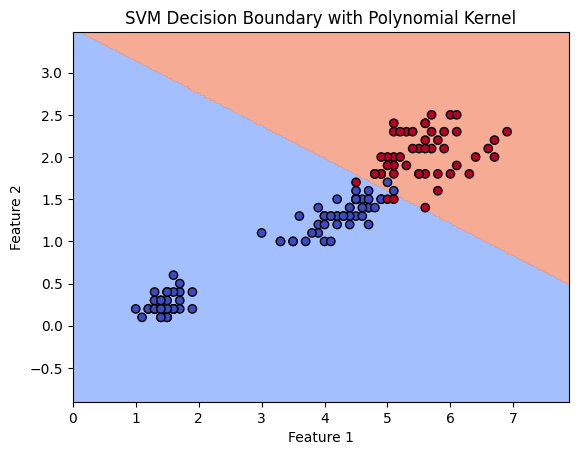

In [36]:
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, Y, plot_title="Decision Boundary"):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(plot_title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_clf, x, y, plot_title="SVM Decision Boundary with Polynomial Kernel")

# NON Linear SVM

**Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as polynomial features in some cases this can result in a linearly separable dataset.
Consider the left plot: it represents a simple dataset with just one feature
x1
. This dataset is not linearly separable, as you can see. But if you add a second fea‐
ture x2
 = (x1
)
2
, the resulting 2D dataset is perfectly linearly separable.**

In [23]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [24]:
X,Y = make_moons(n_samples=100,noise=.15,random_state=42)

In [25]:
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),StandardScaler(),LinearSVC(C=10,max_iter=10_000,random_state=42))

In [26]:
polynomial_svm_clf.fit(X,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

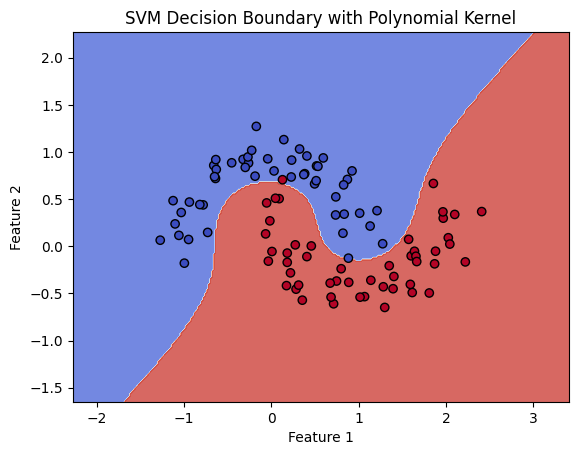

In [37]:

# Plot decision boundary

plot_decision_boundary(polynomial_svm_clf, X, Y, plot_title="SVM Decision Boundary with Polynomial Kernel")

**Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.**

# Polynomial Kernel


**Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick . It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them. So there is no combinato‐
rial explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class. Let’s test it on the moons dataset:**

In [31]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(
  StandardScaler(),
  SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, Y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

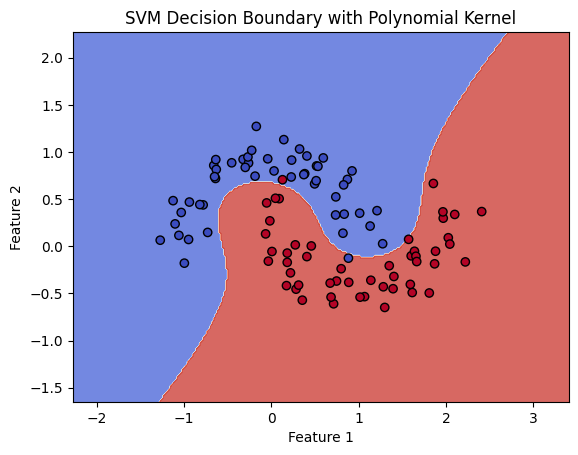

In [38]:

# Plot decision boundary
plot_decision_boundary(poly_kernel_svm_clf, X, Y, plot_title="SVM Decision Boundary with Polynomial Kernel")

# Adding Similarity Features


**Another technique to tackle nonlinear problems is to add features computed using a
similarity function that measures how much each instance resembles a particular
landmark. For example, let’s take the one-dimensional dataset discussed earlier and
add two landmarks to it at x1
 = –2 and x1
 = 1 . Next,
let’s define the similarity function to be the Gaussian Radial Basis Function (RBF)
with γ = 0.3 .
Equation 5-1. Gaussian RBF
ϕγ ᅴ, ℓ = exp −γ֫ ᅴ − ℓ ֫
2
It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at
the landmark). Now we are ready to compute the new features. For example, let’s look
at the instance x1
 = –1: it is located at a distance of 1 from the first landmark, and 2
from the second landmark. Therefore its new features are x2 = exp (–0.3 × 12
) ≈ 0.74
and x3
 = exp (–0.3 × 22
) ≈ 0.30. 
formed dataset (dropping the original features). As you can see, it is now linearly
separable.**

# Gaussian RBF Kernel


**Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features, especially on large training sets. However, once
again the kernel trick does its SVM magic: it makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add
them. Let’s try the Gaussian RBF kernel using the SVC class**

In [39]:
rbf_kernel_svm_clf = make_pipeline(
  StandardScaler(),
  SVC(kernel="rbf", gamma=5, C=0.001)
 )
rbf_kernel_svm_clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

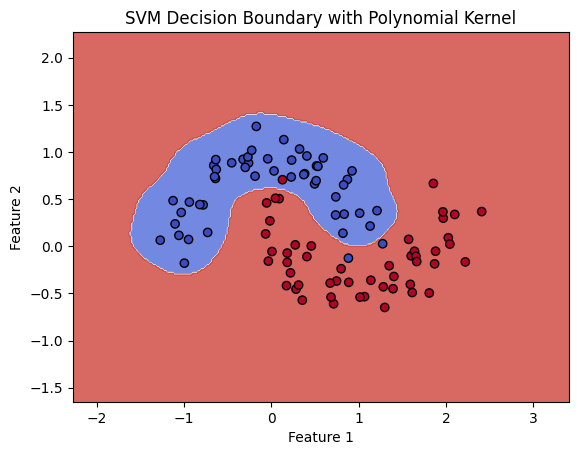

# Computational Complexity


**The LinearSVC class is based on the liblinear library, which implements an optimized
algorithm for linear SVMs.1
 It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training
time complexity is roughly O(m × n).
The algorithm takes longer if you require a very high precision. This is controlled by
the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification
tasks, the default tolerance is fine.
The SVC class is based on the libsvm library, which implements an algorithm that sup‐
ports the kernel trick.2
 The training time complexity is usually between O(m2
 × n)
and O(m3
 × n). Unfortunately, this means that it gets dreadfully slow when the num‐
ber of training instances gets large (e.g., hundreds of thousands of instances). This
algorithm is perfect for complex but small or medium training sets. However, it scales
well with the number of features, especially with sparse features (i.e., when each
instance has few nonzero features). In this case, the algorithm scales roughly with the
average number of nonzero features per instance. Table 5-1 compares Scikit-Learn’s**

# SVM Regression


**As we mentioned earlier, the SVM algorithm is quite versatile: not only does it sup‐
port linear and nonlinear classification, but it also supports linear and nonlinear
regression. The trick is to reverse the objective: instead of trying to fit the largest pos‐
sible street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances o the street). The width of the street is controlled by a hyperparame‐
ter ϵ
linear data, one with a large margin (ϵ = 1.5) and the other with a small margin (ϵ =
0.5).**

In [41]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(x, y)


LinearSVR(epsilon=1.5)

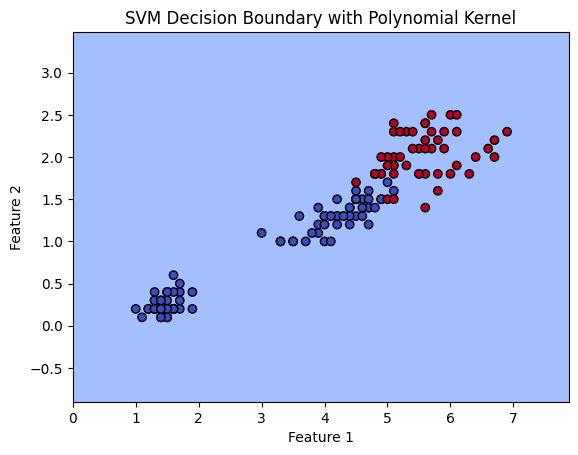

In [42]:
plot_decision_boundary(svm_reg, x, y, plot_title="SVM Decision Boundary with Polynomial Kernel")

# Summery


**Support Vector Machines (SVMs) are a class of supervised learning algorithms that can be used for both classification and regression tasks. Here's a summary of key concepts related to SVMs:**

    Linear SVM:
        SVM aims to find a hyperplane that best separates different classes in the feature space.
        The hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data point of each class.
        Support vectors are the data points that lie closest to the decision boundary.

    Kernel Trick:
        SVM can be extended to handle non-linear decision boundaries using the kernel trick.
        The kernel function allows SVM to implicitly map the input data into a higher-dimensional space, making it possible to find a linear hyperplane in that space.

    Types of Kernels:
        Common kernel functions include:
            Linear Kernel: Suitable for linearly separable data.
            Polynomial Kernel: Introduces polynomial features to handle non-linear data.
            Radial Basis Function (RBF) Kernel: Measures the similarity between data points in a higher-dimensional space.
            Sigmoid Kernel: Similar to neural networks, it is often used in binary classification problems.

    Hyperparameters:
        C Parameter: Controls the trade-off between having a smooth decision boundary and classifying training points correctly. A smaller C allows for a wider margin but may misclassify some points.
        Gamma Parameter (for RBF kernel): Defines how far the influence of a single training example reaches. Higher values lead to a tighter decision boundary.

    Soft Margin SVM:
        In situations where data is not perfectly separable, a soft margin SVM allows for some misclassification.
        The C parameter determines the penalty for misclassified points.

    Multi-Class Classification:
        SVM inherently supports binary classification, but several strategies can be used for multi-class problems, including one-vs-one and one-vs-all approaches.

    Normalization/Standardization:
        SVM performance can be sensitive to the scale of input features. It is common to standardize or normalize data before applying SVM.

    Advantages:
        Effective in high-dimensional spaces.
        Memory efficient due to the use of support vectors.
        Versatile with different kernel functions.

    Limitations:
        Not well-suited for very large datasets.
        Sensitivity to noise, especially in high-dimensional spaces.
        Choice of the kernel and hyperparameters can impact performance.

    Libraries:
        Popular libraries for SVM implementation include Scikit-learn in Python, LIBSVM, and SVMlight.

**Understanding these concepts provides a foundation for effectively applying SVMs to various machine learning problems.**